In [42]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer import QasmSimulator
from math import pi


In [43]:
b = '101'
n = len(b)

q_reg1 = QuantumRegister(n, 'reg1')
q_reg2 = QuantumRegister(n, 'reg2')
c_reg = ClassicalRegister(n)

circuit = QuantumCircuit(q_reg1, q_reg2, c_reg)
circuit.h(q_reg1)
circuit.barrier()

circuit.cx(q_reg1, q_reg2)
circuit.barrier()

circuit.cx(q_reg1[0], q_reg2[0])
circuit.cx(q_reg1[0], q_reg2[2])
circuit.barrier()


In [44]:
circuit.measure(q_reg2, c_reg)

In [45]:
circuit.h(q_reg1)
circuit.barrier()

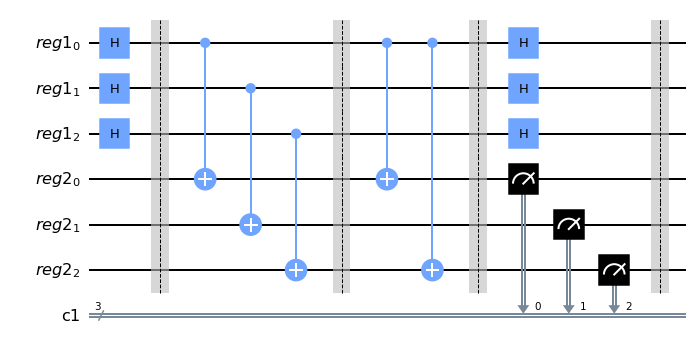

In [46]:
circuit.draw(output='mpl')

In [47]:
print(c_reg[0])

Clbit(ClassicalRegister(3, 'c1'), 0)


In [48]:
circuit.measure(q_reg1, c_reg)

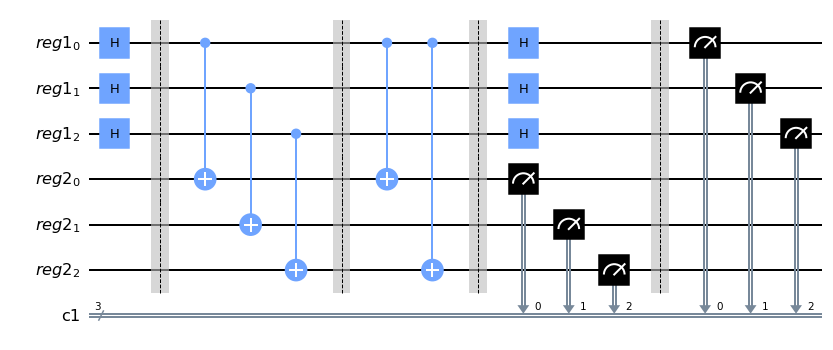

In [49]:
circuit.draw(output='mpl')

In [50]:
measurement = circuit.copy()
backend = QasmSimulator()
qc_compiled = transpile(measurement, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'101': 226, '000': 253, '010': 275, '111': 270}


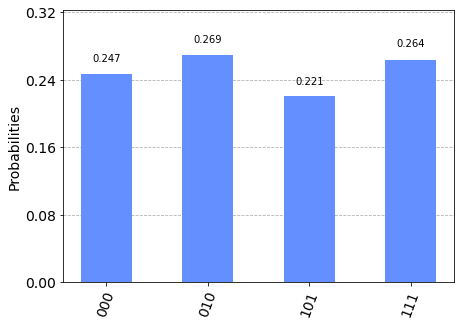

In [51]:
plot_histogram(counts)

In [52]:
from qiskit_textbook.tools import simon_oracle

In [53]:
print(simon_oracle)

<function simon_oracle at 0x7f92d68aedd0>


In [54]:
temp = simon_oracle('101')

In [55]:
print(type(temp))

<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


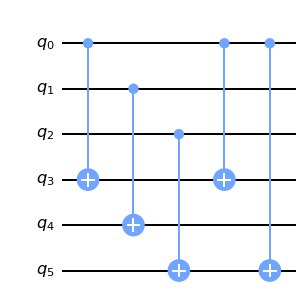

In [56]:
temp.draw(output='mpl')

In [73]:
b = '101'
n = len(b)

circuit = QuantumCircuit(n*2, n)
circuit.h(range(n))

new_circuit = circuit.compose(simon_oracle(b))
new_circuit.barrier()

new_circuit.h(range(n))
new_circuit.measure(range(n), range(n))

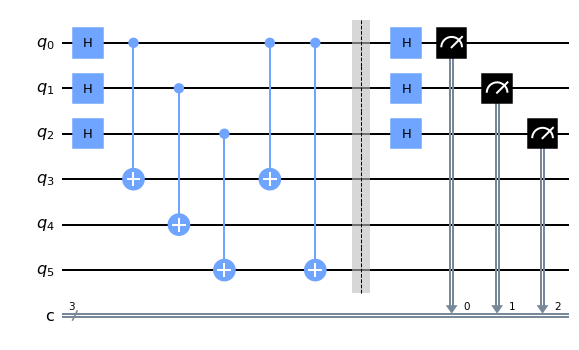

In [74]:
new_circuit.draw(output='mpl')

In [75]:
measurement = new_circuit.copy()
backend = QasmSimulator()
qc_compiled = transpile(measurement, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'000': 269, '010': 252, '101': 272, '111': 231}


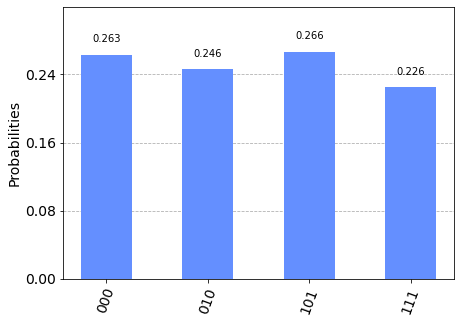

In [76]:
plot_histogram(counts)